<a href="https://colab.research.google.com/github/Alumno-85/ESTADISTICA/blob/main/M2_AI2_BernalFranklin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# URL del archivo CSV
url = 'https://raw.githubusercontent.com/Alumno-85/ESTADISTICA/main/datos_facturas.csv'

# Cargar el archivo CSV en un DataFrame, especificando el separador ';' y el decimal ','
df = pd.read_csv(url, sep=';', decimal=',')

df.head()

,id,fecha,mes,cliente,factura_pagada,importe_factura,tipo_IVA,porcentaje_IVA,IVA,total_pagado
0,1,01/01/2010,Enero,clienteA,si,100,normal,18,18.0,118.0
1,2,02/01/2010,Enero,clienteB,no,150,normal,18,27.0,177.0
2,3,03/01/2010,Enero,clienteC,si,75,normal,18,13.5,88.5
3,4,04/01/2010,Enero,clienteD,si,200,normal,18,36.0,236.0
4,5,05/01/2010,Enero,clienteA,no,125,normal,18,22.5,147.5


In [26]:
# Parte 1.1. Hallar las medidas de centralización: media, mediana y moda. Analiza los resultados obtenidos.

# Calculamos el número de observaciones
n = df['total_pagado'].count()
print(f"Número de observaciones: {n}")

# Calculamos el valor mínimo y máximo de las observaciones
min_val = df['total_pagado'].min()
max_val = df['total_pagado'].max()

# Calculamos la raíz del número de observaciones para las clases
raiz_n = int(np.ceil(np.sqrt(n)))

# Calculamos la amplitud y amplitud de clase
range_val = max_val - min_val
class_width = range_val / raiz_n

# Creamos los intervalos de clase
bins = np.linspace(min_val, max_val, raiz_n + 1)

# Calculamos las marcas de clase
class_marks = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)]

# Calcular las frecuencias absolutas
freq_abs = pd.cut(df['total_pagado'], bins=bins, include_lowest=True).value_counts().sort_index()

# Calcular la frecuencia relativa
freq_rel = freq_abs / n

# Calcular la frecuencia acumulada y frecuencia acumulada relativa
freq_acum = freq_abs.cumsum().tolist()  # Convertir a lista
freq_rel_acum = freq_rel.cumsum().tolist()  # Convertir a lista

# Calcular la media usando las marcas de clase y frecuencias relativas
mean_val = sum([mark * rel_freq for mark, rel_freq in zip(class_marks, freq_rel)])
print(f'Media: {mean_val:.2f}')

# Calcular la mediana usando las marcas de clase y las frecuencias acumuladas
median_class_index = next(i for i, cum_freq in enumerate(freq_acum) if cum_freq >= n/2)
median_class = class_marks[median_class_index]
cum_freq_before = freq_acum[median_class_index - 1] if median_class_index > 0 else 0
median_val = median_class - class_width/2 + (n/2 - cum_freq_before) / freq_abs.iloc[median_class_index] * class_width
print(f'Mediana: {median_val:.2f}')

# Calcular la moda
# Obtener el intervalo de clase con mayor frecuencia absoluta
mode_interval = freq_abs.idxmax()
# Tomar el punto medio del intervalo como moda
mode_val = (mode_interval.left + mode_interval.right) / 2
print(f'Moda: {mode_val}')

# Crear el DataFrame con los resultados
results_df = pd.DataFrame({
    'Intervalo': freq_abs.index.astype(str),
    'Marca de Clase': class_marks,
    'Frecuencia Absoluta': freq_abs.values,
    'Frecuencia Relativa': freq_rel.values,
    'Frecuencia Acumulada': freq_acum,
    'Frecuencia Relativa Acumulada': freq_rel_acum,
})

# Mostrar el DataFrame con las frecuencias y demás cálculos
print(results_df)


Número de observaciones: 45
Media: 136.03
Mediana: 125.38
Moda: 103.25
        Intervalo  Marca de Clase  Frecuencia Absoluta  Frecuencia Relativa  \
0  (29.499, 59.0]           44.25                    3             0.066667   
1    (59.0, 88.5]           73.75                    6             0.133333   
2   (88.5, 118.0]          103.25                   12             0.266667   
3  (118.0, 147.5]          132.75                    6             0.133333   
4  (147.5, 177.0]          162.25                    6             0.133333   
5  (177.0, 206.5]          191.75                    4             0.088889   
6  (206.5, 236.0]          221.25                    8             0.177778   

   Frecuencia Acumulada  Frecuencia Relativa Acumulada  
0                     3                       0.066667  
1                     9                       0.200000  
2                    21                       0.466667  
3                    27                       0.600000  
4          

Inicio indicando que el cálculo de clases o intervalos se lo hizo de la forma simple: (raiz cuadrada del número de observaciones), en vista que la data no mo es muy grande como para aplicar la ley de Sturges.

**La Media Aritmética** es una medida obligada a ser calculada a pesar de que si tenemos valores extremos bajos o altos esta puede sesgar el resultado, sin embargo el valor obtenido es de 136.03

**La Mediana**, esta medida es más exacta y recomendada para identificar el valor central en nuestro caso es 125.38

La Moda, es el valor con mayor frecuencia, en nuestro caso es de 103.25

Si estas tres medidas tuvieran el mismo valor tendríamos una simetría, aunque es utópico que se de ese caso si embargo lo anoto. Mas adelante con la incllusión de otras medidas estadísticas de dispersión podremos ver que clase de Simetría tienen los datos obtenidos en estas tres medidas. Sin embargo solo con las medidas obtenidas puedo inidcar que es una Asimetría positiva en vista que la o	La media aritmética es mayor que la mediana y la mediana es mayor que la moda.


In [27]:
# Parte 1.2. Las medidas de dispersión: rango, varianza, desviación típica y coeficiente de variación. Analiza los resultados obtenidos.
# Calculamos el rango (ya lo calculaste previamente)
print(f'Rango: {range_val:.2f}')

# Calculamos la varianza para datos agrupados
variance_grouped = sum([(freq * (mark - mean_val) ** 2) for mark, freq in zip(class_marks, freq_abs)]) / n
print(f'Varianza para datos agrupados: {variance_grouped:.2f}')

# Calculamos la desviación típica como la raíz cuadrada de la varianza
std_dev_grouped = np.sqrt(variance_grouped)
print(f'Desviación Típica para datos agrupados: {std_dev_grouped:.2f}')

# Calculamos el coeficiente de variación como desviación típica / media * 100
coefficient_of_variation_grouped = std_dev_grouped / mean_val * 100
print(f'Coeficiente de Variación para datos agrupados: {coefficient_of_variation_grouped:.2f}')


Rango: 206.50
Varianza para datos agrupados: 3025.46
Desviación Típica para datos agrupados: 55.00
Coeficiente de Variación para datos agrupados: 40.44


**Rango:** este valor este momento no me dice mucho considerando 206.5 de facturas de que?, depende mucho del giro de negocio, avanzo con los siguientes medidas para poder explicar mejor.
**Varianza:** por si sola tampoco me dice nada, avazo a la desviación típica.
**Desviación Típica:** Es cuanto se aleja de la media aritmética, en este caso es 55 es una dispersión alta si tomamos en cuenta que el **Coeficiente de Variación** está en 40.44% inidca una dispersión relativamente alta con respecto a la media.


In [28]:
# Parte 1.3. Las medidas de posición: rango intercuartílico, cuartil primero y percentil 90. Analiza los resultados obtenidos.
# Función para encontrar la clase de un cuartil o percentil
def find_class_interval(cum_freq, n, factor):
    for i, freq in enumerate(cum_freq):
        if freq >= n * factor:
            return i

# Calcular Q1 (Primer Cuartil)
Q1_index = find_class_interval(freq_acum, n, 0.25)
Q1_class = class_marks[Q1_index]
cum_freq_before_Q1 = freq_acum[Q1_index - 1] if Q1_index > 0 else 0
Q1 = Q1_class - class_width / 2 + ((n * 0.25 - cum_freq_before_Q1) / freq_abs.iloc[Q1_index]) * class_width

# Calcular Q3 (Tercer Cuartil)
Q3_index = find_class_interval(freq_acum, n, 0.75)
Q3_class = class_marks[Q3_index]
cum_freq_before_Q3 = freq_acum[Q3_index - 1] if Q3_index > 0 else 0
Q3 = Q3_class - class_width / 2 + ((n * 0.75 - cum_freq_before_Q3) / freq_abs.iloc[Q3_index]) * class_width

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Calcular el percentil 90 (P90)
P90_index = find_class_interval(freq_acum, n, 0.90)
P90_class = class_marks[P90_index]
cum_freq_before_P90 = freq_acum[P90_index - 1] if P90_index > 0 else 0
P90 = P90_class - class_width / 2 + ((n * 0.90 - cum_freq_before_P90) / freq_abs.iloc[P90_index]) * class_width

print(f'Primer Cuartil (Q1): {Q1:.2f}')
print(f'Tercer Cuartil (Q3): {Q3:.2f}')
print(f'Rango Intercuartílico (IQR): {IQR:.2f}')
print(f'Percentil 90 (P90): {P90:.2f}')

# Agregar los resultados al DataFrame para visualizarlos
#results_df['Q1'] = [Q1] * len(results_df)
#results_df['Q3'] = [Q3] * len(results_df)
#results_df['IQR'] = [IQR] * len(results_df)
#results_df['P90'] = [P90] * len(results_df)

# Mostrar el DataFrame con las frecuencias y demás cálculos
print(results_df)


Primer Cuartil (Q1): 94.03
Tercer Cuartil (Q3): 182.53
Rango Intercuartílico (IQR): 88.50
Percentil 90 (P90): 219.41
        Intervalo  Marca de Clase  Frecuencia Absoluta  Frecuencia Relativa  \
0  (29.499, 59.0]           44.25                    3             0.066667   
1    (59.0, 88.5]           73.75                    6             0.133333   
2   (88.5, 118.0]          103.25                   12             0.266667   
3  (118.0, 147.5]          132.75                    6             0.133333   
4  (147.5, 177.0]          162.25                    6             0.133333   
5  (177.0, 206.5]          191.75                    4             0.088889   
6  (206.5, 236.0]          221.25                    8             0.177778   

   Frecuencia Acumulada  Frecuencia Relativa Acumulada  
0                     3                       0.066667  
1                     9                       0.200000  
2                    21                       0.466667  
3                    2

**Cuartil 1 (Q1):** = 94.03 indica que el 25% de los datos son menores o iguales a este valor.
**Cuartil 3 (Q3)**: = 182.53, indica que el 75% de los datos son menores o iguales a este valor.
**Rango Intercuartílico (IQR):** = 88.50, lo que indica que la dispersión de la mitad central de los datos es relativamente amplia.
**Percentil 90 (P90)**:= 219.41 indica que el 90% de los datos son menores o iguales a este valor, lo que indica la posición de un dato en el extremo superior de la distribución.

Asimetría de Fisher (Skewness): 0.22
Curtosis (Kurtosis): 1.89


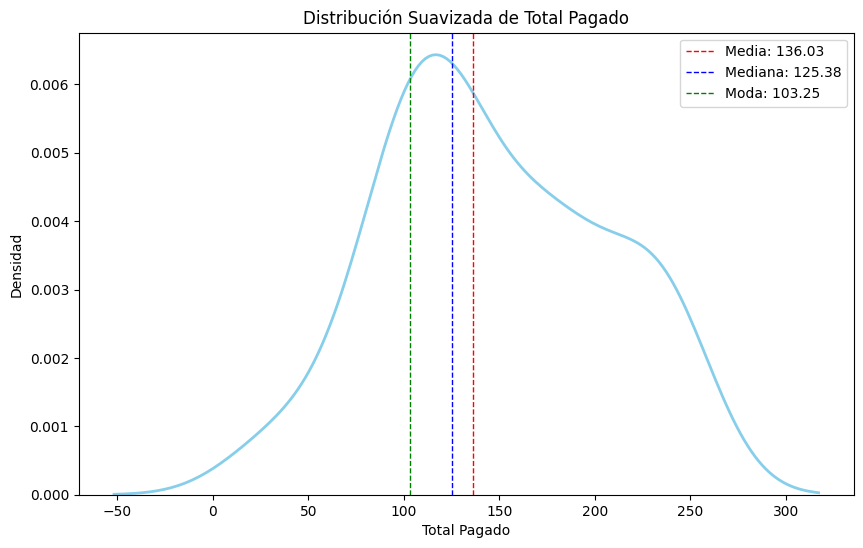

In [30]:
# Parte 1.4. Las medidas de concentración y forma: curtosis, asimetría y el gráfico asociado. Analiza los resultados obtenidos.
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la desviación estándar usando las marcas de clase y frecuencias relativas
variance_val = sum([(mark - mean_val) ** 2 * rel_freq for mark, rel_freq in zip(class_marks, freq_rel)])
std_dev_val = variance_val ** 0.5

# Calcular la asimetría (Skewness) de Fisher
skewness_val = (n * sum([(mark - mean_val) ** 3 * freq for mark, freq in zip(class_marks, freq_abs)]) /
                ((n-1) * (n-2) * (std_dev_val ** 3)))

# Calcular la curtosis (Kurtosis)
kurtosis_val = sum([(mark - mean_val) ** 4 * rel_freq for mark, rel_freq in zip(class_marks, freq_rel)]) / (std_dev_val ** 4)

print(f'Asimetría de Fisher (Skewness): {skewness_val:.2f}')
print(f'Curtosis (Kurtosis): {kurtosis_val:.2f}')

# Graficar la distribución suavizada con líneas
plt.figure(figsize=(10, 6))
sns.kdeplot(df['total_pagado'], color="skyblue", linewidth=2)

# Añadir líneas verticales para la media, mediana y moda
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Media: {mean_val:.2f}')
plt.axvline(median_val, color='blue', linestyle='dashed', linewidth=1, label=f'Mediana: {median_val:.2f}')
plt.axvline(mode_val, color='green', linestyle='dashed', linewidth=1, label=f'Moda: {mode_val:.2f}')

# Configurar el título y las etiquetas del gráfico
plt.title('Distribución Suavizada de Total Pagado')
plt.xlabel('Total Pagado')
plt.ylabel('Densidad')
plt.legend()
plt.show()


**Asimetria de Fisher:** = 0.22 indica que la distribución de los datos tiende a ser ligeramente sesgada hacia la derecha, esto significa que la cola derecha de la distribución es más larga, y la mayoría de los datos se encuentran en el lado izquierdo.

**Curtosis (Kurtosis):** = 1.89, la distribución exhibe una leptocurtosis, lo que significa que tiene colas relativamente pesadas y un pico agudo en comparación con una distribución normal.

Esto indica que hay una concentración de datos alrededor de la media y una mayor concentración de valores extremos (tanto altos como bajos) en comparación con una distribución normal.

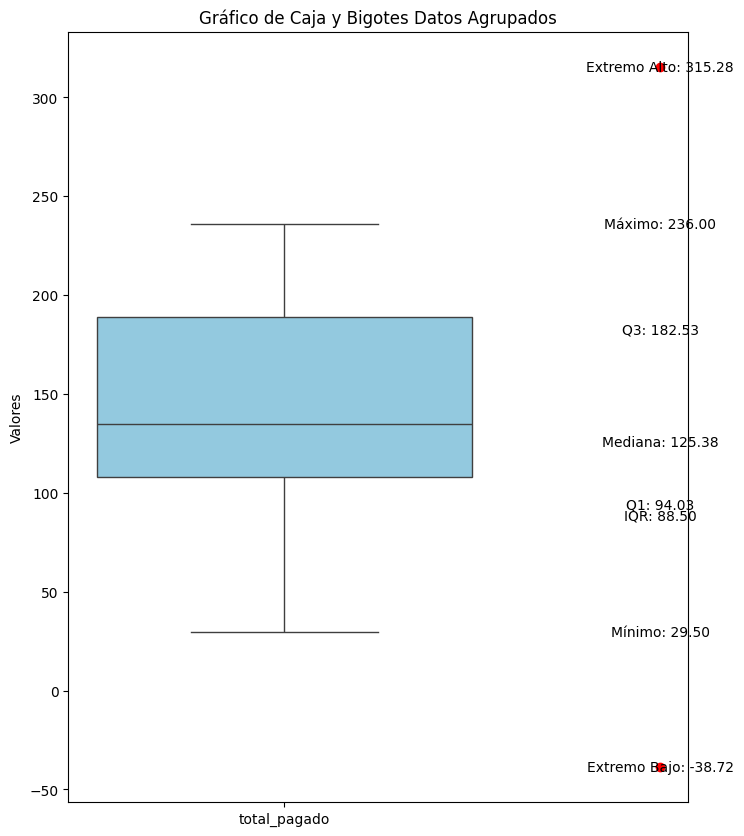

In [31]:
# Parte 1.5 Realiza un análisis de todos los datos obtenidos en los apartados anteriores y añade un gráfico de box-plot explicando los resultados.
# Calcular los valores extremos bajos y altos
lower_extreme = Q1 - 1.5 * IQR
upper_extreme = Q3 + 1.5 * IQR

# Encontrar la última observación antes del valor extremo bajo
last_before_lower = df[df['total_pagado'] < lower_extreme]['total_pagado'].max()

# Encontrar la última observación antes del valor extremo alto
last_before_upper = df[df['total_pagado'] > upper_extreme]['total_pagado'].min()

# Crear el gráfico de Box-Plot con la caja en el centro y el rango intercuartílico
plt.figure(figsize=(8, 10))
box_plot = sns.boxplot(data=[df['total_pagado']], vert=True, width=0.5, color='skyblue', fliersize=8)

# Añadir puntos para los valores extremos
plt.scatter([0.5, 0.5], [lower_extreme, upper_extreme], marker='o', color='red')

# Añadir etiquetas para los valores extremos
plt.text(0.5, lower_extreme, f'Extremo Bajo: {lower_extreme:.2f}', verticalalignment='center', horizontalalignment='center', color='black', fontsize=10)
plt.text(0.5, upper_extreme, f'Extremo Alto: {upper_extreme:.2f}', verticalalignment='center', horizontalalignment='center', color='black', fontsize=10)

# Añadir etiquetas para Q1, Q3, Mediana, IQR, mínimo y máximo
plt.text(0.5, Q1, f'Q1: {Q1:.2f}', verticalalignment='center', horizontalalignment='center', color='black', fontsize=10)
plt.text(0.5, Q3, f'Q3: {Q3:.2f}', verticalalignment='center', horizontalalignment='center', color='black', fontsize=10)
plt.text(0.5, median_val, f'Mediana: {median_val:.2f}', verticalalignment='center', horizontalalignment='center', color='black', fontsize=10)
plt.text(0.5, IQR, f'IQR: {IQR:.2f}', verticalalignment='center', horizontalalignment='center', color='black', fontsize=10)
plt.text(0.5, min_val, f'Mínimo: {min_val:.2f}', verticalalignment='center', horizontalalignment='center', color='black', fontsize=10)
plt.text(0.5, max_val, f'Máximo: {max_val:.2f}', verticalalignment='center', horizontalalignment='center', color='black', fontsize=10)

# Añadir título y etiquetas
plt.title('Gráfico de Caja y Bigotes Datos Agrupados')
plt.ylabel('Valores')
plt.xlabel('')

# Mostrar el gráfico
plt.show()




Voya analizar de afuera hacia adentro, comienzo por los valores extremos como se observa no tenemos valores atípicos extremos, si tenemos valores típicos, las líneas de corte del bigote constan de los valores mínimos y máximos que serían los valores típicos de la variable, mientras que en la caja esta delimitada por el Q1=94.03 y Q3=182.53 por tanto el 50% de todos los pagos se distribuye entre estos dos límites.

En resumen, podemos ver que los datos están sesgados hacia la derecha, ya que la mediana está más cerca de Q1 que de Q3.

In [32]:
# Parte 2.1 ANALIZA los resultados e informa de quién es el cliente que ha pagado MÁS en todas las facturas.

# Filtrar solo las facturas pagadas
facturas_pagadas = df[df['factura_pagada'].str.lower() == 'si']

total_pagado_por_cliente = facturas_pagadas.groupby('cliente')['total_pagado'].sum()
num_facturas_por_cliente = facturas_pagadas.groupby('cliente')['factura_pagada'].count()

cliente_que_ha_pagado_mas = total_pagado_por_cliente.idxmax()
monto_pagado_mas = total_pagado_por_cliente.max()
num_facturas_cliente_mas = num_facturas_por_cliente[cliente_que_ha_pagado_mas]
print(f"El cliente que ha pagado más en todas las facturas es: {cliente_que_ha_pagado_mas} con un total de {monto_pagado_mas:.2f} dólares y {num_facturas_cliente_mas} facturas pagadas.")

# Parte 2.2 ANALIZA los resultados e informa de quién es el cliente que ha pagado MENOS facturas en el mes de febrero.
febrero_df = facturas_pagadas[facturas_pagadas['mes'].str.lower() == 'febrero']
if not febrero_df.empty:
    facturas_pagadas_febrero = febrero_df.groupby('cliente')['factura_pagada'].count()
    cliente_que_ha_pagado_menos_febrero = facturas_pagadas_febrero.idxmin()
    facturas_pagadas_menos_febrero = facturas_pagadas_febrero.min()
    monto_pagado_febrero = febrero_df[febrero_df['cliente'] == cliente_que_ha_pagado_menos_febrero]['total_pagado'].sum()

    print(f"El cliente que ha pagado menos facturas en el mes de febrero es: {cliente_que_ha_pagado_menos_febrero} con un total de {facturas_pagadas_menos_febrero} facturas pagadas y un monto total de {monto_pagado_febrero:.2f} dólares.")
else:
    print("No hay datos de facturas pagadas en el mes de febrero.")



El cliente que ha pagado más en todas las facturas es: clienteA con un total de 1534.00 dólares y 10 facturas pagadas.
El cliente que ha pagado menos facturas en el mes de febrero es: clienteC con un total de 1 facturas pagadas y un monto total de 29.50 dólares.


**Parte 2.1:** Aquí mi preguntan clientes que **"han pagado"**, por tanto aplico la validación 'Si' de la columna factura_pagada que contiene una variabe cualitativa dicotómica (Si, No), para la presentación de resultados en este caso menos es más por tanto visualizo en una sola ínea el números de facturas y el monto, mas adelante haré una análisis del Dataframe con respecto a este apartado.

**Parte 2.2**: Exáctamente igual que el punto 2.1 con clientes que **"han pagado"**, con la diferencia que piden el que ha pagado menos facturas en febrero, visulaizo el número de facturas y el monto.

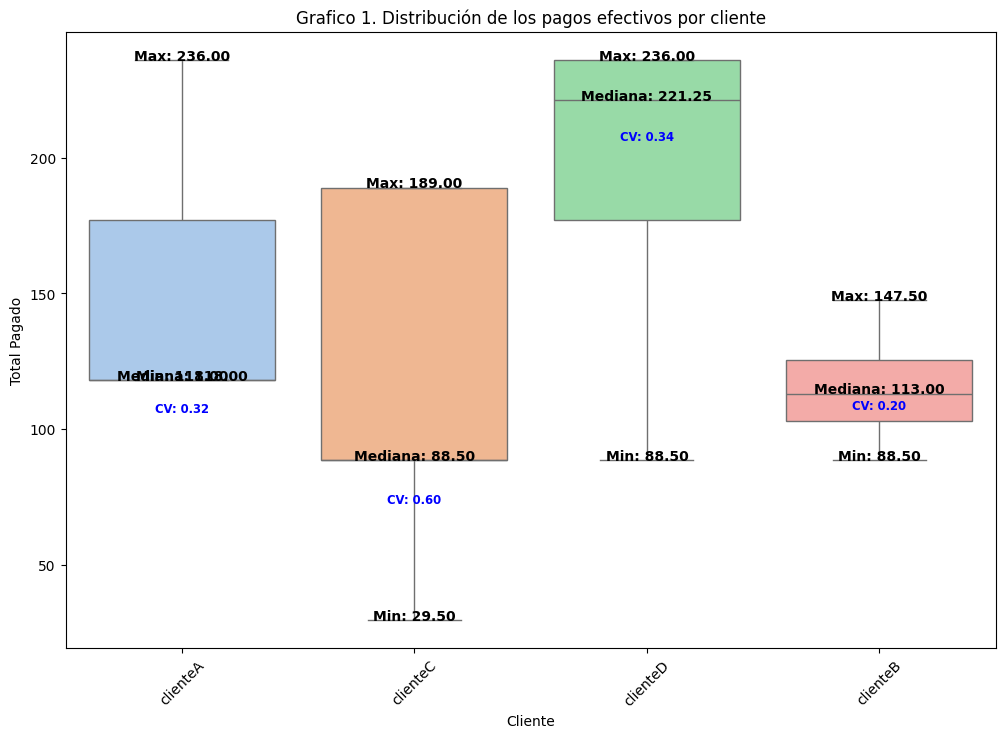

In [33]:
# Parte 2.3 Añadir un gráfico de box-plot de los clientes. Conclusiones y recomendaciones después de todo el análisis realizado.

# Filtrar solo las facturas pagadas
facturas_pagadas = df[df['factura_pagada'].str.lower() == 'si']

# Crear el gráfico de box-plot para los pagos totales por cliente
plt.figure(figsize=(12, 8))
box_plot = sns.boxplot(x='cliente', y='total_pagado', data=facturas_pagadas, hue='cliente', palette='pastel', legend=False)

# Añadir los valores en el gráfico
for cliente in facturas_pagadas['cliente'].unique():
    datos_cliente = facturas_pagadas[facturas_pagadas['cliente'] == cliente]['total_pagado']
    Q1 = datos_cliente.quantile(0.25)
    Q3 = datos_cliente.quantile(0.75)
    median = datos_cliente.median()
    IQR = Q3 - Q1
    min_val = datos_cliente.min()
    max_val = datos_cliente.max()

    # Calcular el coeficiente de variación
    cv = datos_cliente.std() / datos_cliente.mean()

    # Posiciones en el gráfico
    pos = facturas_pagadas['cliente'].unique().tolist().index(cliente)

    # Añadir texto en el gráfico
   # plt.text(pos, Q1, f'Q1: {Q1:.2f}', horizontalalignment='center', size='medium', color='black', weight='semibold')
   # plt.text(pos, Q3, f'Q3: {Q3:.2f}', horizontalalignment='center', size='medium', color='black', weight='semibold')
    plt.text(pos, median, f'Mediana: {median:.2f}', horizontalalignment='center', size='medium', color='black', weight='semibold')
    plt.text(pos, min_val, f'Min: {min_val:.2f}', horizontalalignment='center', size='medium', color='black', weight='semibold')
    plt.text(pos, max_val, f'Max: {max_val:.2f}', horizontalalignment='center', size='medium', color='black', weight='semibold')
    plt.text(pos, median - 0.1 * (max_val - min_val), f'CV: {cv:.2f}', horizontalalignment='center', size='small', color='blue', weight='semibold')

    # Identificar y marcar los valores atípicos
    outliers = datos_cliente[(datos_cliente < (Q1 - 1.5 * IQR)) | (datos_cliente > (Q3 + 1.5 * IQR))]
    for outlier in outliers:
        plt.text(pos, outlier, f'{outlier:.2f}', horizontalalignment='center', size='small', color='red', weight='semibold')

# Configuraciones adicionales del gráfico
plt.title('Grafico 1. Distribución de los pagos efectivos por cliente')
plt.xlabel('Cliente')
plt.xticks(rotation=45)
plt.ylabel('Total Pagado')
plt.legend([],[], frameon=False)  # Remover la leyenda
plt.show()




**Parte 2.3:** En el Gráfico 1. box-plot se visuaiza de mejor manera la respuesta de los puntos 2.1 y 2.2 en el cual en el cliente A se observa que su pago mínimo es igual a la Mediana, es decir los pagos realizados de este clientes es del 50% Q2 hacia arriba, Mientras que el cliente C tiene el pago mínimo pero lo considero como un valor atípico pues, si observamos la caja el resto de pagos se encuentran entre el Q1 y Q3, aquí también coincide la Mediana con el valor del Q1, es decir el resto de observaciones están sobre el 50%, con respecto a la dispersión solamente con observar el alto de la caja del Cliente C demuestra que tiene mas dispersión que todos los otros clientes, lo cual se confirma con el Coeficiente de variación del 60% versus el resto de clientes, el de menos dispersión Cliente B con CV=20%, era importante citar estas evidencias que llaman al atención. A continuación he realizado otra gráfico pero con todas las observaciones sin importar si ha pagado o No, porque ne realidad si a mi me preguntan tendría que analizar el total de la data y tomar decisiones en función del comportamiento.

Entonces en el **Grafico 2.** se observa que las dispersiones a pesar que bajo en coeficiente de variación en cada uno los clientes sigue siendo mayor el cliente C (44%), pero denota que la Mediana en todos los casos superó los valores anteriores lo que implica que los clientes que no han pagado tienen la mayoría valores más altos que la mediana.

En base a ese escenario me inclino a analizar Cartera, si bien es cierto el Dataframe que nos han dado no visualiza una columna de fecha de vencimiento, para ver si el pago esta vencido, debo asumir que por el status de factura pagada si lo está caso contrario tendría que haber obligadamente una columna de fecha de vencimiento o los días de vencimiento de la factura, para ello me permito hacer un gráfico sencillo **Grafico 3.** que nos muestre visulamete el impacto de esa cartera vencida, se puede apreciar que el 31% (2.052) no han pagado, lo que si es preocupante.

Recomendará al Departamento de cartera revise sus indicadores de morosidad, edad de cartera, la segmente en tramos y se den las gestiones necesarias para la recuperación, como: Gestión Telefónica, Mensajes masivos Whatsapp, de ser necesario visita de campo, dependiendo los dias vencidos y monto gestiones extrajudiciales, Burós de Crédito, etc.

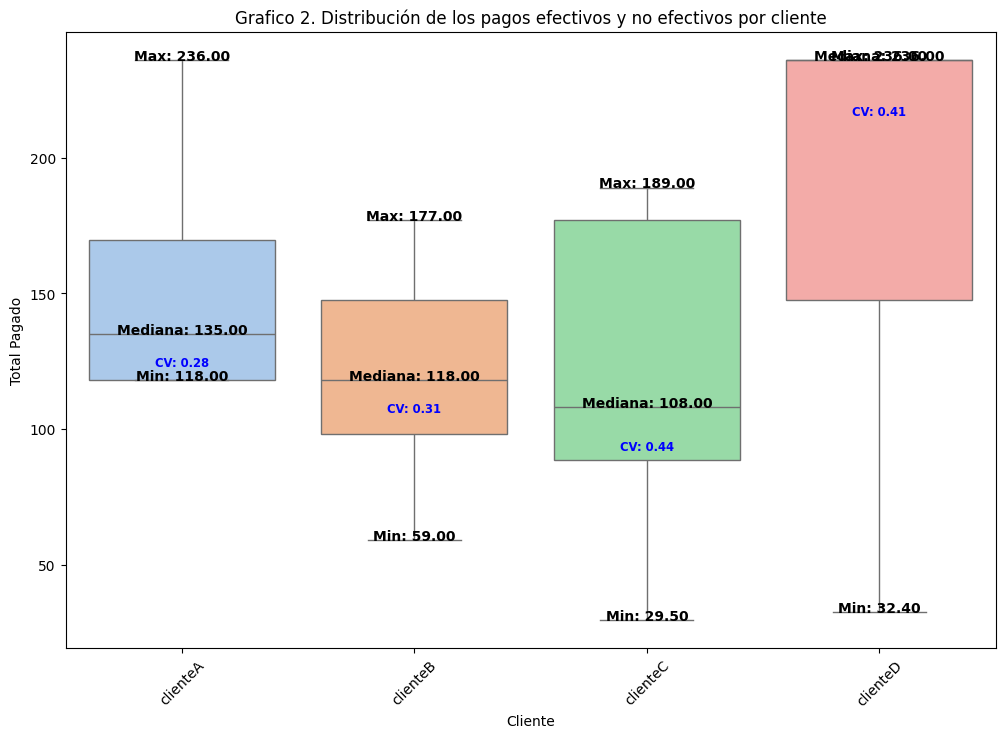

In [34]:
# Parte 2.3.1 Explicación Complementaria
# Crear el gráfico de box-plot para los pagos totales por cliente
plt.figure(figsize=(12, 8))
box_plot = sns.boxplot(x='cliente', y='total_pagado', data=df, palette='pastel', hue='cliente', legend=False)

for cliente in df['cliente'].unique():
    datos_cliente = df[df['cliente'] == cliente]['total_pagado']
    Q1 = datos_cliente.quantile(0.25)
    Q3 = datos_cliente.quantile(0.75)
    median = datos_cliente.median()
    IQR = Q3 - Q1
    min_val = datos_cliente.min()
    max_val = datos_cliente.max()

    cv = datos_cliente.std() / datos_cliente.mean()

    pos = df['cliente'].unique().tolist().index(cliente)

    plt.text(pos, median, f'Mediana: {median:.2f}', horizontalalignment='center', size='medium', color='black', weight='semibold')
    plt.text(pos, min_val, f'Min: {min_val:.2f}', horizontalalignment='center', size='medium', color='black', weight='semibold')
    plt.text(pos, max_val, f'Max: {max_val:.2f}', horizontalalignment='center', size='medium', color='black', weight='semibold')
    plt.text(pos, median - 0.1 * (max_val - min_val), f'CV: {cv:.2f}', horizontalalignment='center', size='small', color='blue', weight='semibold')

    outliers = datos_cliente[(datos_cliente < (Q1 - 1.5 * IQR)) | (datos_cliente > (Q3 + 1.5 * IQR))]
    for outlier in outliers:
        plt.text(pos, outlier, f'{outlier:.2f}', horizontalalignment='center', size='small', color='red', weight='semibold')

plt.title('Grafico 2. Distribución de los pagos efectivos y no efectivos por cliente')
plt.xlabel('Cliente')
plt.xticks(rotation=45)
plt.ylabel('Total Pagado')
plt.show()

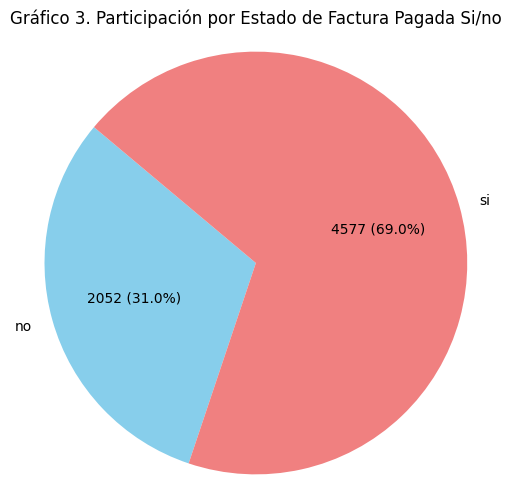

In [35]:
# Agrupar por 'factura_pagada' y sumar los valores 'total_pagado'
df_grouped = df.groupby('factura_pagada')['total_pagado'].agg(['sum', 'count'])

# Crear el gráfico de sectores
plt.figure(figsize=(6, 6))
plt.pie(df_grouped['sum'], labels=df_grouped.index, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(df_grouped['sum']) / 100, p),
        startangle=140, colors=['skyblue', 'lightcoral'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Gráfico 3. Participación por Estado de Factura Pagada Si/no')
plt.show()

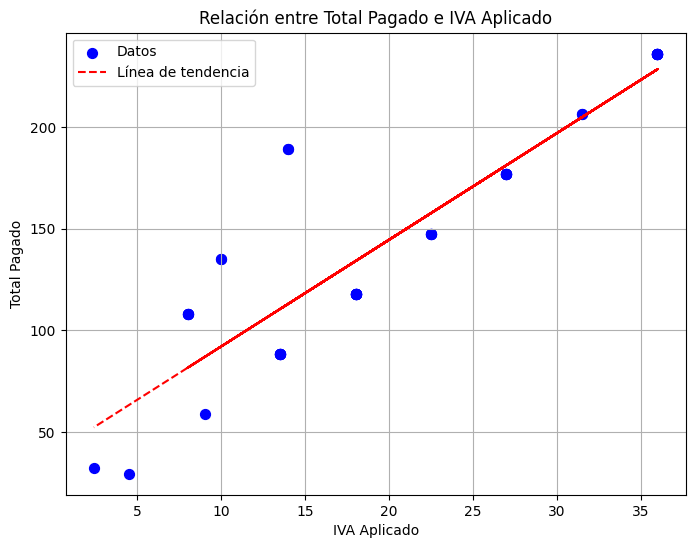

In [19]:
# Parte 3.1 Determina el valor de la covarianza de ambas variables. Analiza el dato resultante obtenido.

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(df['IVA'], df['total_pagado'], s=50, c='blue', label='Datos')

# Ajustar una línea de regresión lineal a los datos
z = np.polyfit(df['IVA'], df['total_pagado'], 1)
p = np.poly1d(z)
plt.plot(df['IVA'], p(df['IVA']), c='red', linestyle='--', label='Línea de tendencia')

plt.xlabel('IVA Aplicado')
plt.ylabel('Total Pagado')
plt.title('Relación entre Total Pagado e IVA Aplicado')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
# Parte 3.2

# Calcular la covarianza entre las variables 'total_pagado' e 'IVA'
covariance = df['total_pagado'].cov(df['IVA'])

# Calcular el coeficiente de correlación entre las variables 'total_pagado' e 'IVA'
correlation = df['total_pagado'].corr(df['IVA'])

# Imprimir el valor de la covarianza y el coeficiente de correlación
print('Covarianza entre total pagado e IVA:', covariance)
print('Coeficiente de correlación entre total pagado e IVA:', correlation)

# Análisis del resultado de la covarianza y correlación
if covariance > 0:
    print('La covarianza es positiva, lo que indica una relación directa entre total pagado e IVA.')
elif covariance < 0:
    print('La covarianza es negativa, lo que indica una relación inversa entre total pagado e IVA.')
else:
    print('La covarianza es cercana a cero, lo que sugiere una falta de relación lineal entre total pagado e IVA.')

Covarianza entre total pagado e IVA: 526.768808080808
Coeficiente de correlación entre total pagado e IVA: 0.9068240006145696
La covarianza es positiva, lo que indica una relación directa entre total pagado e IVA.


**Análisis:** Junto los dos puntos 3.1 y 3.2 para analizar con datos; la gráfica es muy visual, la linea de tendencia muestra una reación directa entre ambas variables, lo confirma la covarianza positiva entre dos variables en la que indica que hay una relación directa entre ellas, esto significa que cuando una de las variables aumenta, la otra también tiende a aumentar.

El valor de covarianza positivo de 526.7688 entre las variables 'total_pagado' e 'IVA'. para ahondar en esta explicación, tomando en cuenta que la covarianza tiene limitaciones, ya que no está normalizada y su magnitud puede depender de la escala de las variables, por ello, es recomendable utilizar otras métricas como la correlación para tener una mejor idea de la relación lineal entre las variabless, este coeficiente de correación me da un 90.68%, lo que me indica una fuerte correlación positiva entre el total pagado y el IVA, esto significa que a medida que el total pagado aumenta, el IVA también tiende a aumentar en una proporción considerable.


**Parte 3.3 Se podría hacer un modelo predictivo? ¿Por qué?**

Si bien es cierto la data es de dos meses, asumo que es una toma aleatoria o una empresa nueva, sin embargo indistintamente de lo que sea, en este ejercicio estoy analizando la relación, correlación entre dos variables, por tanto **SI PUEDO** hacer un modelo predictivo, claro siempre que tenga otras variables para aplicar esta tendencia (Presupuesto de ventas anual), en este caso tendría que hacer una regresión lineal debido alajuste del coeficiente de correlación del 90.68% de esta tendencia lineal.

**Ejemplo:** si a la Empresa le pido el Presupuesto de ventas anual, inmediatamente aplicaría la regresión lineal y podría proyectar cuanto de IVA voy a generar en el año considerando cumplimiento proyectado del presupuesto, siempre manejamos el ideal el 100%, a su vez pediría cuanto han presupuestado comprar y cuanto de IVA han proyectado gnerar por este rubro, de manera que se podría saber este año cuanto Impuesto causado tendré que pagar o en el mejor de los casos si tendría Crédito Tributario.

**Parte 4 ANALIZA toda la información obtenida. ¿Cuál sería la recomendación que darías para la toma de decisión en la compañía?**

La recomendación final analizando todos los resultados, es mejorar sus políticas y controles de cartera, es evidente que cuando se analizó todas las observaciones como si todas fueron pagadas, el tiket central de facturación a través de la mediana se elevó en todos los clientes, esto significa mayor flujo, mayor rentabilidad.

Lo positivo, en el análisis del gráfico box-plot, no tuvo valores atípicos extremos, solo tuvieron valores típicos mínimos y máximos.

Saludos.